# Data Visualisation Assignment
Welcome! This notebook will guide you step by step through basic Python programming and data visualisation tasks.

**Topics Covered:**
- Setting up environment variables
- Web scraping with requests and lxml
- Parsing HTML and JSON data
- Handling CSV data
- Visualising data with matplotlib
- Creating SVG graphics

Let's start by checking your Python setup!

In [ ]:
# Load environment variables from .env file and display them
import os
import dotenv
dotenv.load_dotenv()
print("Loaded environment variables:")
print(f"DATA_URL: {os.getenv('DATA_URL')}")

Loaded environment variables:


NameError: name 'os' is not defined

# Data Visualisation Assignment
Welcome! This notebook will guide you step by step through basic Python programming and data visualisation tasks.

**Topics Covered:**
- Setting up environment variables
- Web scraping with requests and lxml
- Parsing HTML and JSON data
- Handling CSV data
- Visualising data with matplotlib
- Creating SVG graphics

Let's start by checking your Python setup!

In [ ]:
# Check your Python version
import sys
print('Your Python version is:', sys.version)

Your Python version is: 3.13.7 (main, Aug 14 2025, 11:12:11) [Clang 17.0.0 (clang-1700.0.13.3)]


## Step 1: Environment Variables
Environment variables are used to store information that your program can use, such as API keys or settings. In Python, you can use the `os` library to access them.

Let's see how to set and read an environment variable in Python.

## 1. Environment Setup and Dependencies
First, let's load our environment variables and import the required libraries. The `.env` file contains configuration settings that we'll use throughout this notebook.

We'll use the `os` library to access environment variables, and `dotenv` to load them from a `.env` file.

In [ ]:
# Install required packages (run this if packages are not already installed)
%pip install python-dotenv requests lxml matplotlib drawsvg

# Load environment variables from .env file and import libraries
import os
from dotenv import load_dotenv
load_dotenv()
# Example: get a variable called API_KEY from .env
api_key = os.getenv('API_KEY')
print('API_KEY:', api_key)

Note: you may need to restart the kernel to use updated packages.
API_KEY: None
Note: you may need to restart the kernel to use updated packages.
API_KEY: None


## Step 2: Load and Preview Wind Speed Data
Now let's load the daily mean wind speed data from the Hong Kong Observatory website using the link stored in your `.env` file.

We'll use the `requests` library to download the CSV file and `pandas` to preview the data.

In [ ]:
# Download and preview wind speed data
import requests
import pandas as pd
import os
from dotenv import load_dotenv
load_dotenv()
data_url = os.getenv('DATA_URL')
response = requests.get(data_url)
with open('wind_speed.csv', 'wb') as f:
    f.write(response.content)
# Skip the first two rows and use the third row as header
try:
    df = pd.read_csv('wind_speed.csv', sep=',', header=2, engine='python')
    print(df.head())
except Exception as e:
    print('Error reading CSV:', e)

  年/Year  月/Month  日/Day 數值/Value 數據完整性/data Completeness
0   1998     10.0    1.0     10.1                       C
1   1998     10.0    2.0     15.9                       C
2   1998     10.0    3.0     21.8                       C
3   1998     10.0    4.0     24.3                       C
4   1998     10.0    5.0     20.6                       C


In [ ]:
# If you see 'ModuleNotFoundError', run this cell to install missing packages
%pip install requests pandas python-dotenv

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Step 3: Visualise Wind Speed Data
Let's plot the daily mean wind speed data using matplotlib. We'll create a line plot, histogram, and box plot to explore the data.

First 10 rows of original DataFrame:
  年/Year  月/Month  日/Day  數值/Value 數據完整性/data Completeness       Date  Year  \
0   1998     10.0    1.0      10.1                       C 1998-10-01  1998   
1   1998     10.0    2.0      15.9                       C 1998-10-02  1998   
2   1998     10.0    3.0      21.8                       C 1998-10-03  1998   
3   1998     10.0    4.0      24.3                       C 1998-10-04  1998   
4   1998     10.0    5.0      20.6                       C 1998-10-05  1998   
5   1998     10.0    6.0      12.4                       C 1998-10-06  1998   
6   1998     10.0    7.0      11.1                       C 1998-10-07  1998   
7   1998     10.0    8.0      14.5                       C 1998-10-08  1998   
8   1998     10.0    9.0      17.3                       C 1998-10-09  1998   
9   1998     10.0   10.0      19.3                       C 1998-10-10  1998   

   Month  Day  
0     10    1  
1     10    2  
2     10    3  
3     10    4  
4     10    5

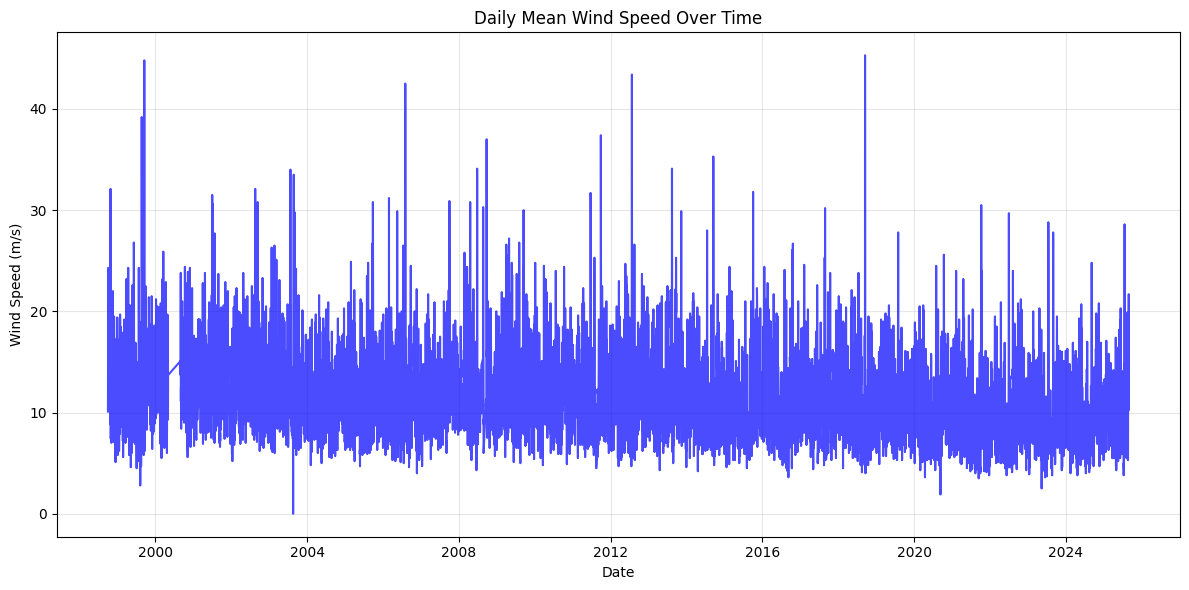

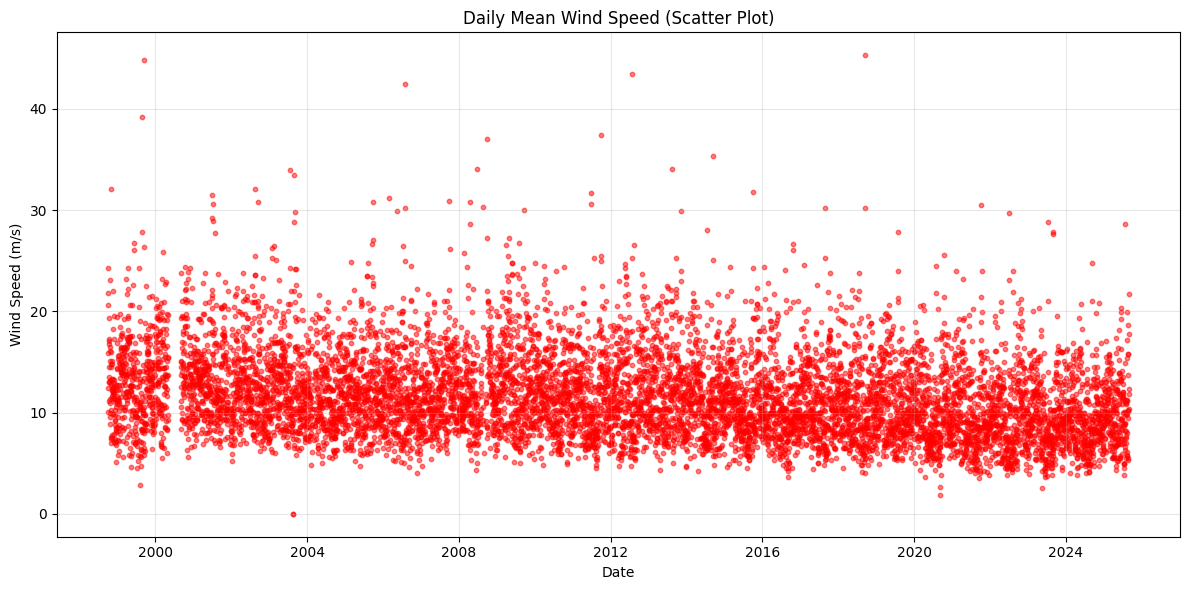

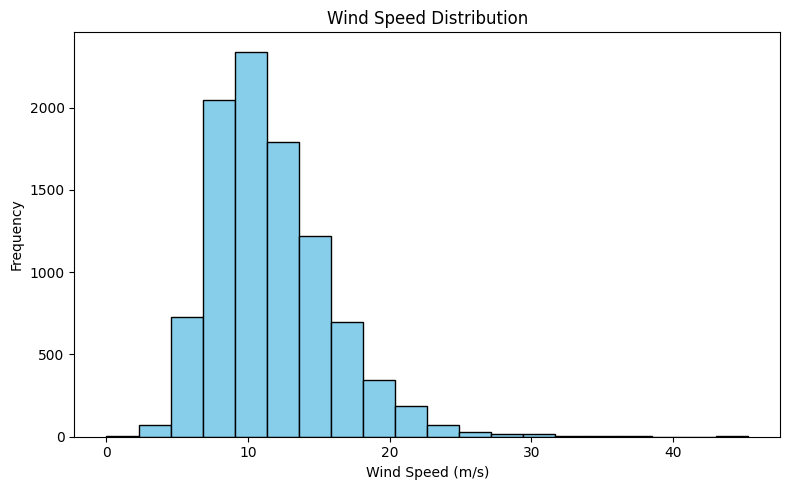

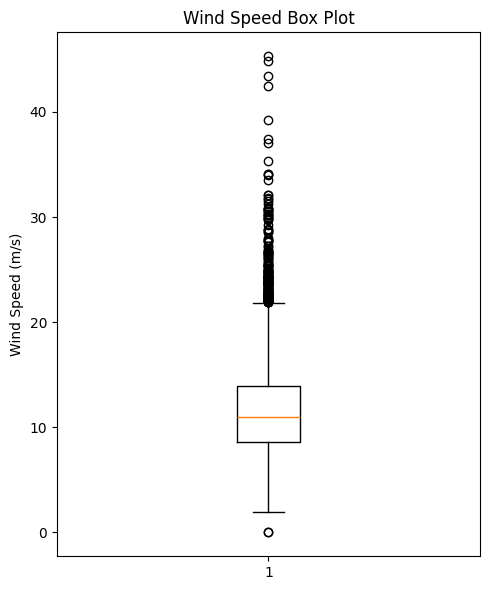

In [ ]:
# Visualise daily mean wind speed data
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Make sure 'df' is loaded from previous steps
if 'df' in locals():
    # Debug: Print a few rows of the original DataFrame and unique wind speed values
    print('First 10 rows of original DataFrame:')
    print(df.head(10))
    wind_col = '數值/Value'
    print('\nUnique wind speed values (raw):')
    print(df[wind_col].unique())

    # Use the correct column names from your data
    date_cols = ['年/Year', '月/Month', '日/Day']

    # Filter out rows with non-numeric year, month, or day
    for col in date_cols:
        df = df[pd.to_numeric(df[col], errors='coerce').notnull()]

    # Convert month and day columns to integers to avoid '.0' in string
    df['Year'] = df['年/Year'].astype(int)
    df['Month'] = df['月/Month'].astype(int)
    df['Day'] = df['日/Day'].astype(int)

    # Combine year, month, day into a single date column
    df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2) + '-' + df['Day'].astype(str).str.zfill(2), errors='coerce')
    # Convert wind speed to float
    df[wind_col] = pd.to_numeric(df[wind_col], errors='coerce')

    # Drop rows with missing values
    df_clean = df.dropna(subset=['Date', wind_col])

    # Debug: Print a few rows and stats
    print('\nFirst 10 rows of cleaned DataFrame:')
    print(df_clean[['Date', wind_col]].head(10))
    print('Number of valid data points:', len(df_clean))
    print('Wind speed min/max:', df_clean[wind_col].min(), df_clean[wind_col].max())

    # Line plot
    plt.figure(figsize=(12,6))
    plt.plot(df_clean['Date'], df_clean[wind_col], color='blue', alpha=0.7)
    plt.title('Daily Mean Wind Speed Over Time')
    plt.xlabel('Date')
    plt.ylabel('Wind Speed (m/s)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Scatter plot
    plt.figure(figsize=(12,6))
    plt.scatter(df_clean['Date'], df_clean[wind_col], color='red', alpha=0.5, s=10)
    plt.title('Daily Mean Wind Speed (Scatter Plot)')
    plt.xlabel('Date')
    plt.ylabel('Wind Speed (m/s)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Histogram
    plt.figure(figsize=(8,5))
    plt.hist(df_clean[wind_col], bins=20, color='skyblue', edgecolor='black')
    plt.title('Wind Speed Distribution')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Box plot
    plt.figure(figsize=(5,6))
    plt.boxplot(df_clean[wind_col], vert=True)
    plt.title('Wind Speed Box Plot')
    plt.ylabel('Wind Speed (m/s)')
    plt.tight_layout()
    plt.show()
else:
    print('Data not loaded. Please run the previous cells to load the wind speed data.')

In [ ]:
# Abstract/Creative SVG bar chart for wind speed statistics
import drawsvg as draw
import math

# Use cleaned wind speed data if available
if 'df_clean' in locals() and not df_clean.empty:
    stats = {
        'Max': df_clean['數值/Value'].max(),
        'Min': df_clean['數值/Value'].min(),
        'Avg': df_clean['數值/Value'].mean()
    }
else:
    stats = {'Max': 3.2, 'Min': 0.5, 'Avg': 1.8}

# Create SVG drawing
d = draw.Drawing(600, 400, origin=(0, 0))

# Abstract background shapes
d.append(draw.Circle(300, 200, 180, fill='#e0f7fa', stroke='none', opacity=0.5))
d.append(draw.Rectangle(50, 50, 500, 300, fill='#fffde7', stroke='#ffe082', stroke_width=4, opacity=0.7))

# Bar chart parameters (abstract layout)
center_x = 300
center_y = 220
radius = 120
bar_length = 120
bar_width = 40
angles = [math.radians(30), math.radians(150), math.radians(270)]
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1']

max_stat = max(stats.values())
scale = bar_length / max_stat

# Draw abstract bars as rotated polygons
for i, (label, value) in enumerate(stats.items()):
    angle = angles[i]
    x0 = center_x + radius * math.cos(angle)
    y0 = center_y + radius * math.sin(angle)
    x1 = x0 + value * scale * math.cos(angle)
    y1 = y0 + value * scale * math.sin(angle)
    
    # Draw bar as a polygon (trapezoid for artistic effect)
    d.append(draw.Lines(
        x0-bar_width/2*math.sin(angle), y0+bar_width/2*math.cos(angle),
        x0+bar_width/2*math.sin(angle), y0-bar_width/2*math.cos(angle),
        x1+bar_width/2*math.sin(angle), y1-bar_width/2*math.cos(angle),
        x1-bar_width/2*math.sin(angle), y1+bar_width/2*math.cos(angle),
        close=True, fill=colors[i], stroke='#333', stroke_width=2, opacity=0.85))
    
    # Draw label in playful position
    label_x = center_x + (radius+bar_length+30) * math.cos(angle)
    label_y = center_y + (radius+bar_length+30) * math.sin(angle)
    d.append(draw.Text(label, 18, label_x, label_y, text_anchor='middle', fill=colors[i], font_family='Comic Sans MS', font_weight='bold', opacity=0.9))
    
    # Draw value near end of bar
    value_x = x1 + 30 * math.cos(angle)
    value_y = y1 + 30 * math.sin(angle)
    d.append(draw.Text(f'{value:.1f} m/s', 14, value_x, value_y, text_anchor='middle', fill='#333', font_family='Arial', font_weight='bold', opacity=0.8))

# Add curved wind lines for artistic effect
for i in range(5):
    d.append(draw.Path(
        f'M {80+i*100},350 Q {130+i*100},320 {180+i*100},350',
        stroke='#90caf9', stroke_width=3, fill='none', opacity=0.6))

# Draw title with shadow
d.append(draw.Text('Wind Speed Abstract', 32, 300, 60, text_anchor='middle', fill='#333', font_family='Arial', font_weight='bold', opacity=0.95))
d.append(draw.Text('Wind Speed Abstract', 32, 303, 63, text_anchor='middle', fill='#b2ebf2', font_family='Arial', font_weight='bold', opacity=0.3))

# Save the SVG
svg_filename = 'wind-speed-abstract.svg'
d.save_svg(svg_filename)
print(f"Artistic wind speed chart saved as: {svg_filename}")

# Display SVG as text
print("\nSVG content:")
print(d.as_svg())

Artistic wind speed chart saved as: wind-speed-abstract.svg

SVG content:
<?xml version="1.0" encoding="UTF-8"?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"
     width="600" height="400" viewBox="0 0 600 400">
<defs>
</defs>
<circle cx="300" cy="200" r="180" fill="#e0f7fa" stroke="none" opacity="0.5" />
<rect x="50" y="50" width="500" height="300" fill="#fffde7" stroke="#ffe082" stroke-width="4" opacity="0.7" />
<path d="M393.92304845413264,297.3205080756888 L413.92304845413264,262.6794919243112 L517.8460969082653,322.6794919243112 L497.8460969082653,357.3205080756888 Z" fill="#ff6b6b" stroke="#333" stroke-width="2" opacity="0.85" />
<text x="533.8268590217984" y="355.0" font-size="18" text-anchor="middle" fill="#ff6b6b" font-family="Comic Sans MS" font-weight="bold" opacity="0.9">Max</text>
<text x="533.8268590217984" y="355.0" font-size="14" text-anchor="middle" fill="#333" font-family="Arial" font-weight="bold" opacity="0.8">45.3 m/s</text>
<pa